# Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
import geopandas as gdp
from folium.plugins import HeatMap
%matplotlib inline

In [2]:
data = pd.read_csv('accidents_2005_to_2007.csv', engine = 'python', nrows = 10000)
data = data.dropna(axis=1, how='all')
data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200501LX50102,531040,175450,-0.115045,51.462807,1,3,1,1,07/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003055,2005
9996,200501LX50103,529550,175360,-0.136515,51.462341,1,3,2,1,07/02/2005,...,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01003041,2005
9997,200501LX50104,529440,173980,-0.138602,51.449964,1,3,2,1,08/02/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003160,2005
9998,200501LX50105,530990,175260,-0.115835,51.461111,1,2,2,1,09/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003020,2005


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200501LX50102,531040,175450,-0.115045,51.462807,1,3,1,1,07/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003055,2005
9996,200501LX50103,529550,175360,-0.136515,51.462341,1,3,2,1,07/02/2005,...,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01003041,2005
9997,200501LX50104,529440,173980,-0.138602,51.449964,1,3,2,1,08/02/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003160,2005
9998,200501LX50105,530990,175260,-0.115835,51.461111,1,2,2,1,09/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003020,2005


In [5]:
print(data)

     Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0     200501BS00001                 525680                  178240  -0.191170   
1     200501BS00002                 524170                  181650  -0.211708   
2     200501BS00003                 524520                  182240  -0.206458   
3     200501BS00004                 526900                  177530  -0.173862   
4     200501BS00005                 528060                  179040  -0.156618   
...             ...                    ...                     ...        ...   
9995  200501LX50102                 531040                  175450  -0.115045   
9996  200501LX50103                 529550                  175360  -0.136515   
9997  200501LX50104                 529440                  173980  -0.138602   
9998  200501LX50105                 530990                  175260  -0.115835   
9999  200501LX50106                 530140                  173660  -0.128651   

       Latitude  Police_For

In [6]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [7]:
data.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
9995,200501LX50102,531040,175450,-0.115045,51.462807,1,3,1,1,07/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003055,2005
9996,200501LX50103,529550,175360,-0.136515,51.462341,1,3,2,1,07/02/2005,...,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01003041,2005
9997,200501LX50104,529440,173980,-0.138602,51.449964,1,3,2,1,08/02/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003160,2005
9998,200501LX50105,530990,175260,-0.115835,51.461111,1,2,2,1,09/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01003020,2005
9999,200501LX50106,530140,173660,-0.128651,51.446928,1,3,2,1,10/02/2005,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01003162,2005


- `Accident_Index`, 
- `Location_Easting_OSGR`,
- `Location_Northing_OSGR`,
- `Longitude` - долгота,
- `Latitude` - ширина,
- `Police_Force` - , 
- `Accident_Severity` - серьёзность аварии,
- `Number_of_Vehicles` - число машин, попавших в аварию,
- `Number_of_Casualties` - число жертв,
- `Date` - дата,
- `Day_of_Week` -день недели,
- `Time` - время,
- `Local_Authority_(District)`,
- `Local_Authority_(Highway)`,
- `1st_Road_Class`, 
- `1st_Road_Number`,
- `Road_Type`, 
- `Speed_limit` - ограниченеи скорости,
- `Junction_Detail`, 
- `Junction_Control`,
- `2nd_Road_Class`,
- `2nd_Road_Number`,
- `Pedestrian_Crossing-Human_Control`,
- `Pedestrian_Crossing-Physical_Facilities`,
- `Light_Conditions`,
- `Weather_Conditions`,
- `Road_Surface_Conditions`,
- `Special_Conditions_at_Site`,
- `Carriageway_Hazards`,
- `Urban_or_Rural_Area`,
- `Did_Police_Officer_Attend_Scene_of_Accident`,
- `LSOA_of_Accident_Location`,
- `Year`


In [8]:
print(data.shape)
print(data.columns)

(10000, 32)
Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
data.at[2, 'Year']

2005

In [11]:
data['Speed_limit']

0       30
1       30
2       30
3       30
4       30
        ..
9995    30
9996    30
9997    30
9998    30
9999    30
Name: Speed_limit, Length: 10000, dtype: int64

In [12]:
data['Urban_or_Rural_Area'][3]

1

In [13]:
data['1st_Road_Number'].dtype.name

'int64'

In [14]:
data.loc[0, 'Time']

'17:42'

In [15]:
type(data['Time'][3])

str

In [16]:
# Время будет хранить не строкой, а в секундах - int
for i in range(len(data['Time'])):
    if isinstance(data.loc[i,'Time'], str):
        time = data.loc[i,'Time'].split(':')
        data.loc[i,'Time'] = int(time[0]) * 60 * 60 + int(time[1]) * 60
    else: 
        data.loc[i,'Time'] = 0


In [17]:
data['Time']

0       63720
1       63360
2         900
3       38100
4       76380
        ...  
9995    49320
9996    78300
9997    43500
9998    42900
9999    37320
Name: Time, Length: 10000, dtype: int64

In [18]:
data['Location_Easting_OSGR'].dtype.name

'int64'

In [19]:
type(data['Junction_Control'])

pandas.core.series.Series

In [20]:
data[['Weather_Conditions', 'Road_Surface_Conditions']].head()

,Weather_Conditions,Road_Surface_Conditions
0,Raining without high winds,Wet/Damp
1,Fine without high winds,Dry
2,Fine without high winds,Dry
3,Fine without high winds,Dry
4,Fine without high winds,Wet/Damp


In [21]:
#data.index = xrange(570011)
data.index

RangeIndex(start=0, stop=10000, step=1)

In [22]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,534749.289000,183636.049000,-0.058501,51.535433,2.457000,2.897300,1.768500,1.161900,4.099700,51257.394000,26.425300,3.859100,493.26640,31.119000,3.126400,208.528800,1.015400,2005.0
std,8629.569106,3836.547387,0.125327,0.033149,8.146336,0.303911,0.634939,0.501711,1.897714,19120.483864,97.493375,1.206065,1087.97838,4.935613,2.833059,750.970786,0.123144,0.0
min,503870.000000,170370.000000,-0.505928,51.417468,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,1.000000,1.000000,0.00000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,528590.000000,181050.000000,-0.147788,51.513125,1.000000,3.000000,1.000000,1.000000,3.000000,37500.000000,3.000000,3.000000,0.00000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,533270.000000,183130.000000,-0.080155,51.530813,1.000000,3.000000,2.000000,1.000000,4.000000,53820.000000,11.000000,3.000000,104.00000,30.000000,3.000000,0.000000,1.000000,2005.0
75%,540260.000000,186240.000000,0.022299,51.557744,1.000000,3.000000,2.000000,1.000000,6.000000,65400.000000,14.000000,5.000000,401.00000,30.000000,6.000000,11.000000,1.000000,2005.0
max,559570.000000,195950.000000,0.300802,51.645416,48.000000,3.000000,8.000000,10.000000,7.000000,86340.000000,570.000000,6.000000,5210.00000,70.000000,6.000000,5210.000000,2.000000,2005.0


/home/fedor/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2005.0, right=2005.0
  ax.set_xlim(boundaries_list[j])
/home/fedor/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2005.0, top=2005.0
  ax.set_ylim(boundaries_list[i])
/home/fedor/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2005.0, right=2005.0
  ax.set_xlim(boundaries_list[i])


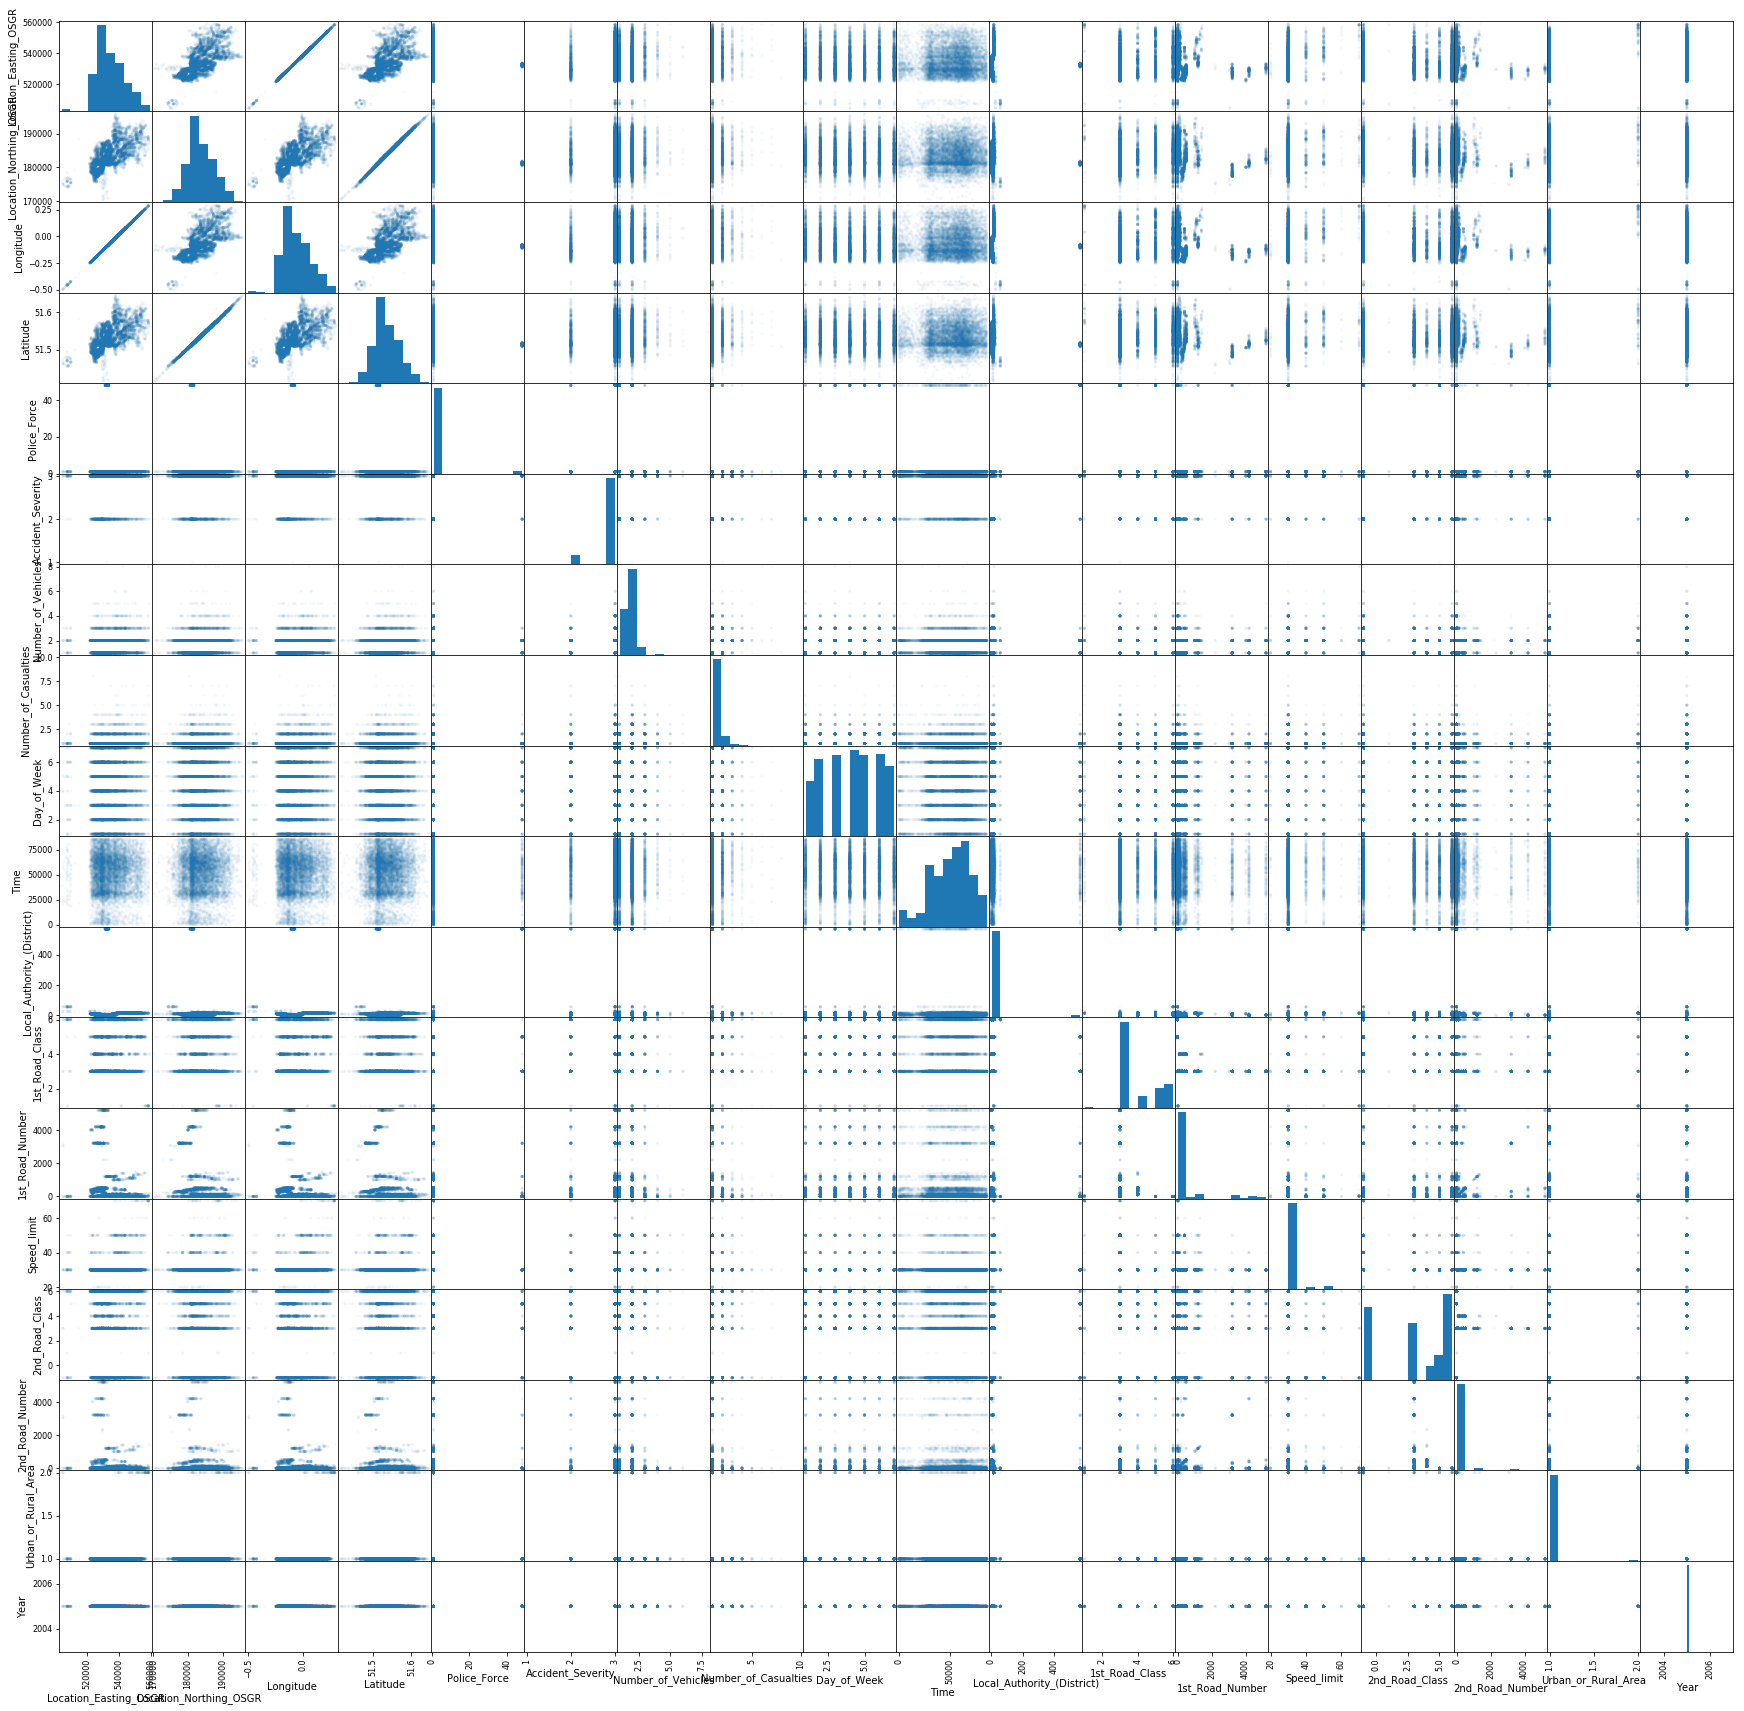

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .04, figsize = (30, 30))
pass

In [24]:
data.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,0.659788,0.999961,0.623320,-0.046605,0.050720,0.116954,0.123223,-0.026450,0.024289,-0.023737,0.097416,-0.213181,0.230679,-0.049354,-0.123294,0.236142,NaN
Location_Northing_OSGR,0.659788,1.000000,0.666395,0.998866,-0.113532,0.044303,0.092246,0.080313,-0.022320,0.022077,-0.101441,0.108077,-0.221739,0.126127,-0.035142,-0.123997,0.137134,NaN
Longitude,0.999961,0.666395,1.000000,0.630197,-0.047627,0.050845,0.117164,0.123231,-0.026502,0.024350,-0.024767,0.097998,-0.214132,0.230440,-0.049360,-0.123799,0.236046,NaN
Latitude,0.623320,0.998866,0.630197,1.000000,-0.114852,0.042880,0.088430,0.075652,-0.021567,0.021477,-0.103833,0.105970,-0.217133,0.116176,-0.033503,-0.121164,0.126903,NaN
Police_Force,-0.046605,-0.113532,-0.047627,-0.114852,1.000000,-0.017397,-0.023841,-0.011718,0.001853,-0.021606,0.997298,-0.019769,-0.000865,-0.041723,-0.004315,0.006726,-0.022369,NaN
Accident_Severity,0.050720,0.044303,0.050845,0.042880,-0.017397,1.000000,0.085646,-0.037865,-0.017273,-0.008055,-0.014802,0.018089,-0.020393,-0.010720,0.041678,-0.007449,0.004852,NaN
Number_of_Vehicles,0.116954,0.092246,0.117164,0.088430,-0.023841,0.085646,1.000000,0.187678,-0.048073,0.010872,-0.016278,-0.024446,-0.023556,0.154156,0.044512,-0.014243,0.082694,NaN
Number_of_Casualties,0.123223,0.080313,0.123231,0.075652,-0.011718,-0.037865,0.187678,1.000000,-0.013174,-0.000875,-0.006356,-0.022789,-0.025682,0.115846,-0.017354,-0.013242,0.098852,NaN
Day_of_Week,-0.026450,-0.022320,-0.026502,-0.021567,0.001853,-0.017273,-0.048073,-0.013174,1.000000,0.005822,0.001249,-0.000897,0.006975,-0.018639,-0.002939,0.009912,-0.006143,NaN
Time,0.024289,0.022077,0.024350,0.021477,-0.021606,-0.008055,0.010872,-0.000875,0.005822,1.000000,-0.019995,0.026668,-0.031542,-0.030115,0.003424,-0.008081,-0.020237,NaN


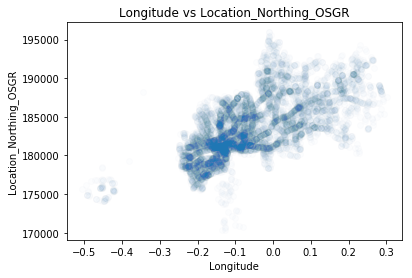

In [25]:
plt.plot(data['Longitude'], data['Location_Northing_OSGR'], 'o', alpha = 0.01)
plt.xlabel('Longitude')
plt.ylabel('Location_Northing_OSGR')
plt.title('Longitude vs Location_Northing_OSGR')
pass

In [26]:
data['Number_of_Vehicles'] < 3

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Number_of_Vehicles, Length: 10000, dtype: bool

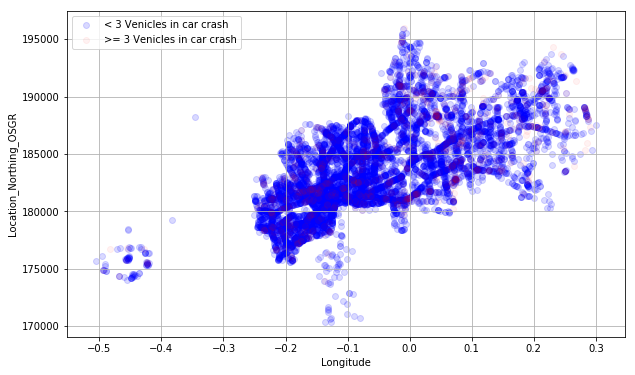

In [27]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Number_of_Vehicles'] < 3]['Longitude'],
            data[data['Number_of_Vehicles'] < 3]['Location_Northing_OSGR'],
            alpha = 0.15,
            label = '< 3 Venicles in car crash',
            color = 'b')

plt.scatter(data[data['Number_of_Vehicles'] >= 3]['Longitude'],
            data[data['Number_of_Vehicles'] >= 3]['Location_Northing_OSGR'],
            alpha = 0.05,
            label = '>= 3 Venicles in car crash',
            color = 'r')

plt.xlabel('Longitude')
# plt.xticks(range(18))
# plt.xlim(0, 17)
plt.ylabel('Location_Northing_OSGR')
plt.legend()
plt.grid()

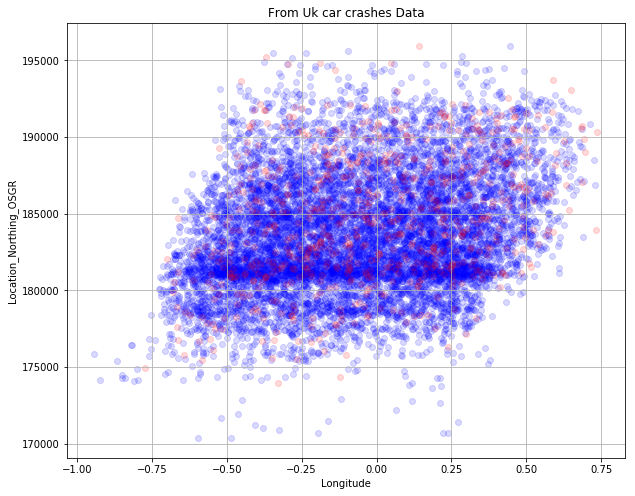

In [28]:
np.random.seed(0)
longitude_num_rnd = data['Longitude'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(longitude_num_rnd[data['Number_of_Vehicles'] < 3],
            data[data['Number_of_Vehicles'] < 3]['Location_Northing_OSGR'],
            alpha = 0.15,
            label = '< 3 Venicles in car crash',
            color = 'b')

plt.scatter(longitude_num_rnd[data['Number_of_Vehicles'] >= 3],
            data[data['Number_of_Vehicles'] >= 3]['Location_Northing_OSGR'],
            alpha = 0.15,
            label = '>= 3 Venicles in car crash',
            color = 'r')

plt.xlabel('Longitude')
# plt.xticks(range(17))
# plt.xlim(0, 17)
plt.ylabel('Location_Northing_OSGR')
plt.title('From Uk car crashes Data')
plt.grid()

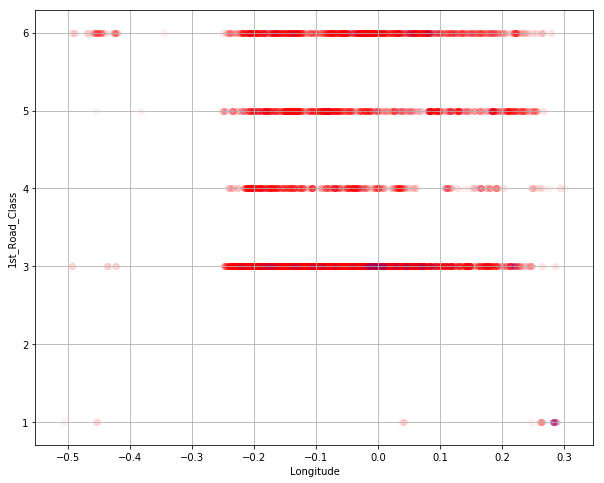

In [29]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Number_of_Vehicles'] < 3]['Longitude'],
            data[data['Number_of_Vehicles'] < 3]['1st_Road_Class'],
            alpha = 0.05,
            label = '< 3 Venicles in car crash',
            color = 'r')

plt.scatter(data[data['Number_of_Vehicles'] > 3]['Longitude'],
            data[data['Number_of_Vehicles'] > 3]['1st_Road_Class'],
            alpha = 0.05,
            label = '>= 3 Venicles in car crash',
            color = 'b')

plt.xlabel('Longitude')
plt.ylabel('1st_Road_Class')
plt.grid()

In [30]:
data.describe(include = ['object'])

,Accident_Index,Date,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,10000,10000,10000,10000,7157,10000,10000,10000,10000,10000,10000,10000,9854,9979
unique,10000,365,26,6,4,3,6,5,9,5,8,6,2,1487
top,200501CW10834,16/09/2005,E09000033,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,E01000004
freq,1,45,1438,7673,4910,9983,7030,7022,8846,8400,9880,9951,8153,270


In [31]:
data.describe(include = 'all')

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,...,10000,10000,10000,10000,10000,10000,10000.000000,9854,9979,10000.0
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,...,6,5,9,5,8,6,NaN,2,1487,NaN
top,200501CW10834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/09/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,NaN,Yes,E01000004,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,...,7030,7022,8846,8400,9880,9951,NaN,8153,270,NaN
mean,NaN,534749.289000,183636.049000,-0.058501,51.535433,2.457000,2.897300,1.768500,1.161900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.015400,NaN,NaN,2005.0
std,NaN,8629.569106,3836.547387,0.125327,0.033149,8.146336,0.303911,0.634939,0.501711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.123144,NaN,NaN,0.0
min,NaN,503870.000000,170370.000000,-0.505928,51.417468,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
25%,NaN,528590.000000,181050.000000,-0.147788,51.513125,1.000000,3.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
50%,NaN,533270.000000,183130.000000,-0.080155,51.530813,1.000000,3.000000,2.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
75%,NaN,540260.000000,186240.000000,0.022299,51.557744,1.000000,3.000000,2.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0


In [32]:
data['Number_of_Vehicles'].unique()

array([1, 2, 4, 3, 5, 6, 8])

In [33]:
data['Day_of_Week'].unique()

array([3, 4, 5, 6, 2, 7, 1])

In [34]:
for name in data['Number_of_Vehicles'].unique():
    print(name, data['Number_of_Vehicles'][data['Day_of_Week'] == name])

1 10      1
26      2
37      2
48      2
59      1
       ..
9919    2
9922    3
9967    3
9991    2
9993    2
Name: Number_of_Vehicles, Length: 1033, dtype: int64
2 4       1
20      1
21      2
22      2
41      2
       ..
9974    2
9975    2
9987    1
9995    1
9996    2
Name: Number_of_Vehicles, Length: 1453, dtype: int64
4 1       1
25      1
29      2
44      2
53      2
       ..
9957    1
9963    2
9977    2
9986    1
9998    2
Name: Number_of_Vehicles, Length: 1617, dtype: int64
3 0       1
5       2
11      2
12      1
13      2
       ..
9982    1
9983    2
9984    1
9985    1
9997    2
Name: Number_of_Vehicles, Length: 1528, dtype: int64
5 2       2
6       2
16      2
31      2
33      2
       ..
9978    2
9979    2
9989    1
9994    2
9999    2
Name: Number_of_Vehicles, Length: 1518, dtype: int64
6 3       1
7       1
17      2
18      2
40      1
       ..
9962    2
9971    1
9972    1
9980    2
9988    1
Name: Number_of_Vehicles, Length: 1541, dtype: int64
8 Series([

In [35]:
data['Speed_limit'].unique()

array([30, 40, 50, 20, 60, 70])

## Задача

- Из `Date` и `Year` оставим только `Year`
- `Accident_Index` уберём также из таблицы, поскольку нам не важен порядковый номер
- `LSOA_of_Accident_Location` принимает слишком большое количество значений для категориального признака, уберём его так же
- `Local_Authority_(Highway)` принимает слишком большое количество значений для категориального признака, уберём его так же

In [36]:
data = data.drop('Date', axis = 1).drop('LSOA_of_Accident_Location', axis = 1).drop('Accident_Index', axis = 1).drop('Local_Authority_(Highway)', axis = 1)
data

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,525680,178240,-0.191170,51.489096,1,2,1,1,3,63720,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,524170,181650,-0.211708,51.520075,1,3,1,1,4,63360,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,524520,182240,-0.206458,51.525301,1,3,2,1,5,900,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,526900,177530,-0.173862,51.482442,1,3,1,1,6,38100,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,528060,179040,-0.156618,51.495752,1,3,1,1,2,76380,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,531040,175450,-0.115045,51.462807,1,3,1,1,2,49320,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
9996,529550,175360,-0.136515,51.462341,1,3,2,1,2,78300,...,None within 50 metres,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
9997,529440,173980,-0.138602,51.449964,1,3,2,1,3,43500,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
9998,530990,175260,-0.115835,51.461111,1,2,2,1,4,42900,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005


# Готовим данные

In [37]:
data['Location_Easting_OSGR'].dtype.name

'int64'

In [38]:
data['Road_Surface_Conditions'].dtype.name

'object'

In [39]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)          

In [40]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']
['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Year']


In [41]:
for c in categorical_columns:
    print(c, data[c].unique())

Road_Type ['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road' 'Unknown']
Junction_Control [nan 'Automatic traffic signal' 'Giveway or uncontrolled' 'Stop Sign'
 'Authorised person']
Pedestrian_Crossing-Human_Control ['None within 50 metres' 'Control by other authorised person'
 'Control by school crossing patrol']
Pedestrian_Crossing-Physical_Facilities ['Zebra crossing' 'Pedestrian phase at traffic signal junction'
 'No physical crossing within 50 meters' 'Central refuge'
 'non-junction pedestrian crossing' 'Footbridge or subway']
Light_Conditions ['Daylight: Street light present'
 'Darkness: Street lights present and lit'
 'Darkness: Street lighting unknown'
 'Darkness: Street lights present but unlit'
 'Darkeness: No street lighting']
Weather_Conditions ['Raining without high winds' 'Fine without high winds' 'Unknown'
 'Snowing without high winds' 'Other' 'Fine with high winds'
 'Raining with high winds' 'Fog or mist' 'Snowing with high winds']
Road_S

## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [42]:
data.median(axis = 0)

Location_Easting_OSGR         533270.000000
Location_Northing_OSGR        183130.000000
Longitude                         -0.080155
Latitude                          51.530813
Police_Force                       1.000000
Accident_Severity                  3.000000
Number_of_Vehicles                 2.000000
Number_of_Casualties               1.000000
Day_of_Week                        4.000000
Time                           53820.000000
Local_Authority_(District)        11.000000
1st_Road_Class                     3.000000
1st_Road_Number                  104.000000
Speed_limit                       30.000000
2nd_Road_Class                     3.000000
2nd_Road_Number                    0.000000
Urban_or_Rural_Area                1.000000
Year                            2005.000000
dtype: float64

In [43]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [44]:
data[numerical_columns].count(axis = 0)

Location_Easting_OSGR         10000
Location_Northing_OSGR        10000
Longitude                     10000
Latitude                      10000
Police_Force                  10000
Accident_Severity             10000
Number_of_Vehicles            10000
Number_of_Casualties          10000
Day_of_Week                   10000
Time                          10000
Local_Authority_(District)    10000
1st_Road_Class                10000
1st_Road_Number               10000
Speed_limit                   10000
2nd_Road_Class                10000
2nd_Road_Number               10000
Urban_or_Rural_Area           10000
Year                          10000
dtype: int64

In [45]:
data[categorical_columns].count(axis = 0)

Road_Type                                      10000
Junction_Control                                7157
Pedestrian_Crossing-Human_Control              10000
Pedestrian_Crossing-Physical_Facilities        10000
Light_Conditions                               10000
Weather_Conditions                             10000
Road_Surface_Conditions                        10000
Special_Conditions_at_Site                     10000
Carriageway_Hazards                            10000
Did_Police_Officer_Attend_Scene_of_Accident     9854
dtype: int64

In [46]:
data['Light_Conditions'].describe()

count                              10000
unique                                 5
top       Daylight: Street light present
freq                                7022
Name: Light_Conditions, dtype: object

In [47]:
type(data['Light_Conditions'].describe())

pandas.core.series.Series

In [48]:
data['Light_Conditions'].describe().top

'Daylight: Street light present'

In [49]:
data['Light_Conditions'] = data['Light_Conditions'].fillna('Daylight: Street light present')

In [50]:
data.describe(include = [object])

,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,10000,7157,10000,10000,10000,10000,10000,10000,10000,9854
unique,6,4,3,6,5,9,5,8,6,2
top,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,7673,4910,9983,7030,7022,8846,8400,9880,9951,8153


In [51]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [52]:
data.describe(include = [object])

,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,6,4,3,6,5,9,5,8,6,2
top,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,7673,7753,9983,7030,7022,8846,8400,9880,9951,8299


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [53]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Did_Police_Officer_Attend_Scene_of_Accident'] ['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards']


In [54]:
data['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
data.at[data['Did_Police_Officer_Attend_Scene_of_Accident'] == 'No', 'Did_Police_Officer_Attend_Scene_of_Accident'] = 0
data.at[data['Did_Police_Officer_Attend_Scene_of_Accident'] == 'Yes', 'Did_Police_Officer_Attend_Scene_of_Accident'] = 1
result = data['Did_Police_Officer_Attend_Scene_of_Accident'].describe
result

<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Did_Police_Officer_Attend_Scene_of_Accident, Length: 10000, dtype: int64>

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.
 

In [56]:
data['Weather_Conditions'].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

Заменим признак `Weather_Conditions` 7 признаками: `Raining without high winds`, `Fine without high winds`, ..., `Other`.

 - Если признак `Weather_Conditions` принимает значение `Raining without high winds`, то признак `Raining without high winds` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `Fine without high winds`, то признак `Fine without high winds` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [57]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Junction_Control_Authorised person',
       'Junction_Control_Automatic traffic signal',
       'Junction_Control_Giveway or uncontrolled',
       'Junction_Control_Stop Sign',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Ph

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [58]:
# data_numerical = data[numerical_columns].drop(('Accident_Severity'), axis = 1).drop(('Accident_Severity'), axis = 1)
# data_numerical.describe()

In [59]:
# data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [60]:
# data_numerical.describe()

## Соединяем все в одну таблицу

In [61]:
data = pd.concat(( data_nonbinary, data[binary_columns], data['Accident_Severity']), axis = 1)
print(data.shape)
#print data.columns

(10000, 54)


In [62]:
data.describe()

,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Junction_Control_Authorised person,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_Stop Sign,...,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Did_Police_Officer_Attend_Scene_of_Accident,Accident_Severity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.134200,0.052200,0.040400,0.767300,0.005100,0.000800,0.001000,0.222200,0.775300,0.001500,...,0.00070,0.006400,0.000500,0.000400,0.000800,0.995100,0.002900,0.000300,0.829900,2.897300
std,0.340884,0.222441,0.196905,0.422574,0.071236,0.028274,0.031609,0.415746,0.417405,0.038703,...,0.02645,0.079748,0.022356,0.019997,0.028274,0.069832,0.053776,0.017319,0.375739,0.303911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [63]:
data

,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Junction_Control_Authorised person,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_Stop Sign,...,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Did_Police_Officer_Attend_Scene_of_Accident,Accident_Severity
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,2
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,3
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,3
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,3
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,3
9996,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,3
9997,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,3
9998,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,2


# X и y

In [64]:
X = data.drop(('Accident_Severity'), axis = 1) # выбрасываем столбец 'Accident_Severity'
y = data['Accident_Severity']
feature_names = X.columns


In [65]:
type(feature_names)

pandas.core.indexes.base.Index

In [66]:
feature_names

Index(['Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Junction_Control_Authorised person',
       'Junction_Control_Automatic traffic signal',
       'Junction_Control_Giveway or uncontrolled',
       'Junction_Control_Stop Sign',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Ph

In [67]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10000, 53)
(10000,)


In [68]:
type(X)

pandas.core.frame.DataFrame

In [69]:
type(y)

pandas.core.series.Series

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7000 3000


In [71]:
7000+3000

10000

In [72]:
#data_drop = data.drop('capital-gain',   axis = 1)\
#                .drop('capital-loss',   axis = 1)\
#                .drop('education',      axis = 1)\
#                .drop('fnlwgt',         axis = 1)\
#                .drop('workclass',      axis = 1)\
#                .drop('race',           axis = 1)\
#                .drop('sex',            axis = 1)\
#                .drop('native-country', axis = 1)\
#                .drop('class',          axis = 1)    

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [74]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [75]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.10457142857142857 0.098


In [76]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [77]:
err_test

0.09799999999999998

In [78]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[   0  294]
 [   0 2706]]


In [79]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [80]:
# Долго!
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=3)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10457142857142854 10


In [81]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.10457142857142857 0.098


# PCA

#### Используем PCA для сокращения размерности пространства признаков. Сокращаем размерность признаков до 2 и изображаем на плоскости

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train)
principalComponents

array([[-0.59788513, -0.34876713,  0.0835763 , -0.16300214, -0.02562712],
       [-0.59788513, -0.34876713,  0.0835763 , -0.16300214, -0.02562712],
       [-0.59788513, -0.34876713,  0.0835763 , -0.16300214, -0.02562712],
       ...,
       [ 1.46146782, -0.88925573,  0.12461862,  0.87542522,  0.50764508],
       [ 1.32661356, -0.85695233,  0.21946776, -0.39476247, -0.02706213],
       [-0.22837452,  1.03660933,  1.45715225,  0.72143044,  0.06085383]])

In [84]:
pca = PCA(n_components = 2)
pcaDuo = pca.fit_transform(X)
pcaDuo 

array([[ 0.11427817,  0.85483066],
       [ 1.79289797,  0.12632486],
       [-0.27590127,  0.64154791],
       ...,
       [-0.6040539 , -0.34138149],
       [ 1.30705488, -0.8636697 ],
       [ 1.45627001, -0.11464501]])

Text(0.5, 1.0, '2 components PCA')

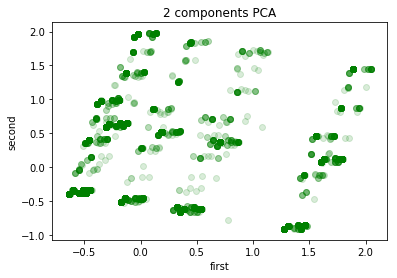

In [97]:
plt.scatter(pcaDuo[:,0], pcaDuo[:,1], color = 'green', alpha = .15)

plt.xlabel('first')
plt.ylabel('second')
plt.title('2 components PCA')

#### Применяем kNN (в нашем случае оптимальное значение соседей было равно 10)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcaDuo, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7000 3000


In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.10471428571428572 0.09866666666666667


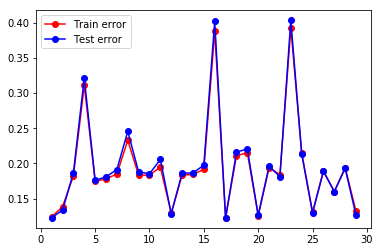

In [88]:
comp = range(1, 30, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    pcaFit = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pcaFit, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'Train error')
plt.plot(comp, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

In [89]:
min_err = min(err_test_mas)
min_err_index = err_test_mas.index(min(err_test_mas))
print("Min err: " + str(min_err))
n_components_best = comp[min_err_index]
print("Best number of components: " + str(n_components_best))

Min err: 0.12266666666666666
Best number of components: 17


### Ошибка существенно скачет от числа компонет. Либо метод ближайщих соседей не совсем корректен для данной задачи, либо не стоит включать в обущающуюся выборку некоторые компоненты.

# SVC

In [90]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.10457142857142857 0.098


### Подбор параметров

In [91]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.10457142857142854 1e-05


In [92]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.132 0.12633333333333333


# Random Forest

In [93]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.10157142857142858 0.09933333333333333


### Значимость признаков

In [94]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [95]:
np.sum(rf.feature_importances_)

1.0

In [96]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'Junction_Control_Stop Sign' (0.059281)
 2. feature 'Junction_Control_Giveway or uncontrolled' (0.041463)
 3. feature 'Junction_Control_Automatic traffic signal' (0.040966)
 4. feature 'Road_Type_Unknown' (0.040591)
 5. feature 'Road_Type_Slip road' (0.040266)
 6. feature 'Road_Type_Dual carriageway' (0.040174)
 7. feature 'Light_Conditions_Darkness: Street lighting unknown' (0.039137)
 8. feature 'Light_Conditions_Darkness: Street lights present but unlit' (0.037298)
 9. feature 'Pedestrian_Crossing-Physical_Facilities_Central refuge' (0.037268)
10. feature 'Pedestrian_Crossing-Human_Control_Control by school crossing patrol' (0.036277)
11. feature 'Junction_Control_Authorised person' (0.035017)
12. feature 'Pedestrian_Crossing-Human_Control_None within 50 metres' (0.034980)
13. feature 'Pedestrian_Crossing-Human_Control_Control by other authorised person' (0.034814)
14. feature 'Road_Type_Roundabout' (0.032812)
15. feature 'Road_Type_Single carriageway' (

IndexError: index 29 is out of bounds for axis 0 with size 29

In [ ]:
feature_names[[1,0,1]]

In [ ]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

# AdaBoost

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

# GBT

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)